# 캐글 자전거 대여 경진대회 https://www.kaggle.com/c/bike-sharing-demand/data

<h2> Dataset Description </h2>

- 2년 동안 자전거를 대여한 데이터가 제공된다. 훈련데이터는 매월 첫 19일까지이고 테스트데이터는 20일부터 말일까지이다.
- 훈련 데이터를 통하여 테스트 데이터의 count를 예측하라

<h2> DataField </h2>

* datetime - hourly date + timestamp
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

<h2> Evaluation </h2>

+ Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE).
+ 분류와 회귀(예측)문제 중 회귀와 관련 된 문제라서 RMSE사용

<h2> Data Load</h2>

In [157]:
# 필요한 패키지 불러오기
import pandas as pd
import numpy as np

# 그래프를 이 노트북 안에 그리게 해줌
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 폰트 사이즈 변경, 마이너스 폰트 깨지는 문제 해결
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.unicode_minus'] = False

In [158]:
# 학습 데이터를 불러옴
train = pd.read_csv('./data/train.csv', parse_dates=['datetime'])
# 테스트 데이터를 불러옴
test = pd.read_csv('./data/test.csv', parse_dates=['datetime'])

In [159]:
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [160]:
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


<h2> Feature Engineering</h2>

In [161]:
# datetime 칼럼을 년, 월, 일, 시, 분, 초, 요일로 쪼갬
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [162]:
# datetime 칼럼을 년, 월, 일, 시, 분, 초, 요일로 쪼갬
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 16)

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

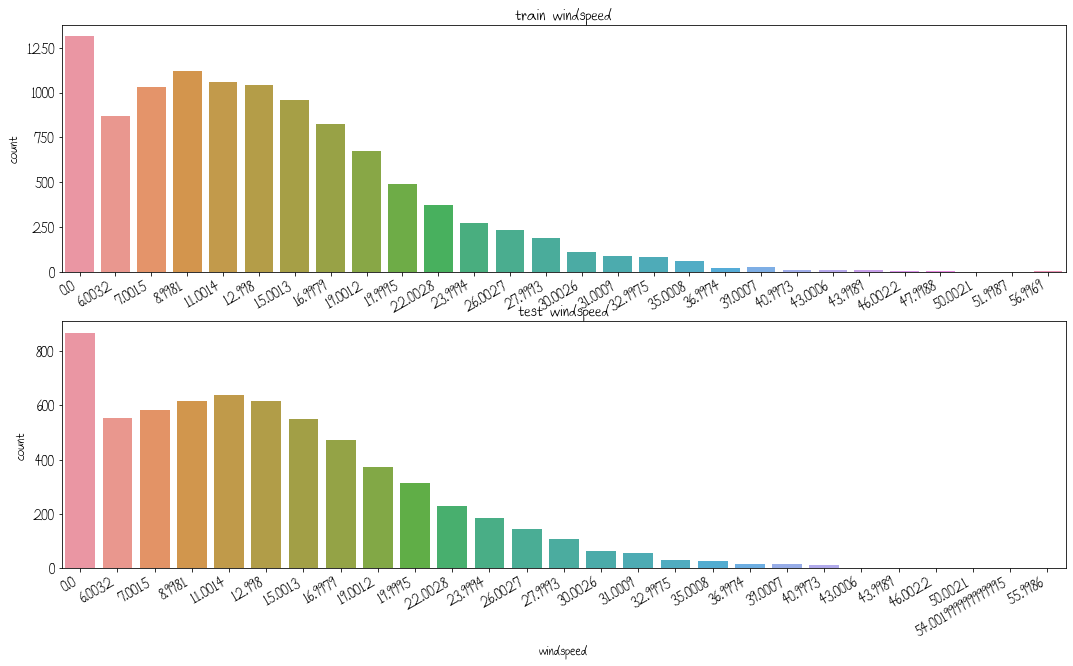

In [163]:
# windspeed 칼럼에서 0인 데이터가 가장 많다 그래서 고쳐주어야 한다
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(18, 10)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count', title='train windspeed')
sns.countplot(data=train, x='windspeed', ax=ax1)

plt.sca(ax2)
plt.xticks(rotation=30, ha='right')
ax2.set(ylabel='Count', title='test windspeed')
sns.countplot(data=test, x='windspeed', ax=ax2)

In [164]:
# 풍속이 0인 값을 풍속이 0아닌 값의 평균으로 채워주는 방법
# train.loc[train['windspeed'] == 0, 'windspeed'] = train['windspeed'].mean()
# test.loc[test['windspeed'] == 0, 'windspeed'] = test['windspeed'].mean()
# 풍속이 0인 값을 평균값으로 채우면 의미가 없을것 같아 하지는 않는다

In [165]:
# 풍속이 0인 값을 풍속이 0이 아닌 값으로 머신러닝을 진행해서 예측후 채워줄 예정

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    

    
    #풍속이 0인 것과 아닌 것을 나누어 주고 feature를 선택한다
    ft = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']
    data0 = data.loc[data['windspeed'] == 0]
    dataNot0 = data.loc[data['windspeed'] != 0]
    
    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataNot0["windspeed"] = dataNot0["windspeed"].astype("str")
    
    # 랜덤포레스트 모델 불러오기
    rf_wind = RandomForestClassifier()
    
    #rf_wind 모델에 풍속이 0이 아닌 데이터를 학습시킨다
    rf_wind.fit(dataNot0[ft], dataNot0['windspeed'])
    
    #rf_wind 모델에서 학습한 것을 가지고 풍속이 0으로 기록 된 데이터의 풍속을 예측한다
    wind0values = rf_wind.predict(X = data0[ft])
    
    #예측한 값을 사용하기 위하여 예측 데이터를 넣어줄 df를 만든다
    predictWind0 = data0
    predictWindNot0 = dataNot0
    
    # 풍속이 0인 df에 예측한 풍속의 결과를 추가해준다
    predictWind0['windspeed'] = wind0values
 
    # 풍속이 0이 아닌 df 밑에 풍속0 즉 예측한 df를 추가해준다(원래 df에서 0만 예측한걸로 바뀜)
    data = predictWindNot0.append(predictWind0)
    # 아까 str로 바꾼걸 다시 str로 바꿈
    data['windspeed'] = data['windspeed'].astype('float')
    # 엉망된 index를 다시 세팅해주고, 새로생긴 index칼럼을 삭제
    data.reset_index(inplace=True)
    data.drop('index', axis=1, inplace=True)
    return data

In [166]:
train = predict_windspeed(train)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
3,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
4,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,8.9981,21,211,232,2012,12,17,12,0,0,0
10882,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,8.9981,15,196,211,2012,12,17,15,0,0,0
10883,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,8.9981,10,652,662,2012,12,18,8,0,0,1
10884,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,12.9980,5,127,132,2012,12,18,22,0,0,1


<AxesSubplot:title={'center':'train_windspeed'}, xlabel='windspeed', ylabel='count'>

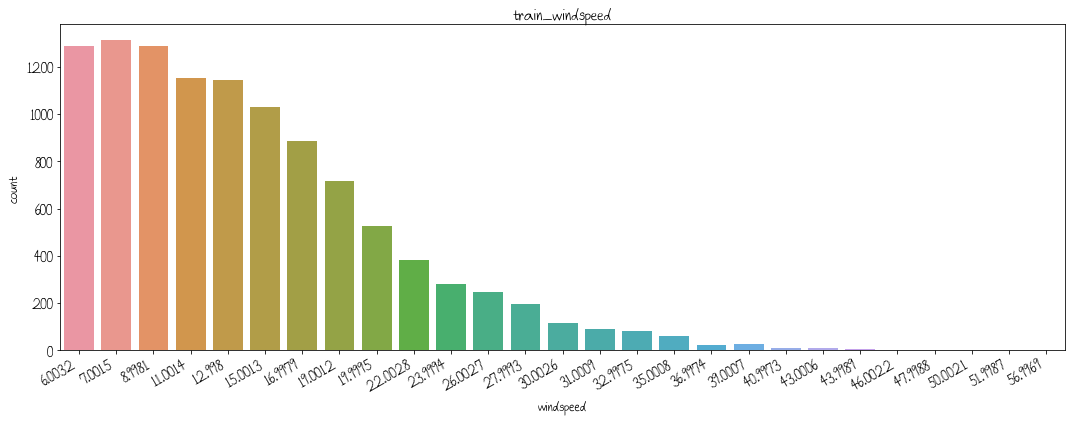

In [168]:
# 0값을 채운후 다시 windspeed 시각화

fig, ax1 = plt.subplots()
fig.set_size_inches(18, 6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count', title='train_windspeed')
sns.countplot(data=train, x='windspeed', ax=ax1)

<h2> Feature Selection </h2>

* Feature Selection을 하는 이유
    * 신호와 잡음을 구분해야 한다
    * Feature가 많다고 좋지도 않고, 적다고 좋지도 않다
    * Feature를 잘 선택하면서 학습을해야 좋은 결과를 얻을 수 있다

In [184]:
# feature에 범주형과 연속형이 존재한다
# 범주형에는 season, holiday, workingday, weather, dayofweek, month, year, hour
# 연속형에는 temp, atemp, humidity, windspeed

# 범주형 feature의 데이터 타입을 category로 바꿔준다
categorical_feature = ['season', 'holiday', 'workingday', 'weather', 'dayofweek', 'year', 'month', 'hour']

for var in categorical_feature:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype('category')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   category      
 2   holiday     6493 non-null   category      
 3   workingday  6493 non-null   category      
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   category      
 10  month       6493 non-null   category      
 11  day         6493 non-null   int64         
 12  hour        6493 non-null   category      
 13  minute      6493 non-null   int64         
 14  second      6493 non-null   int64         
 15  dayofweek   6493 non-null   category      
dtypes: category(8), datetime

In [186]:
# 이번 프로젝트에서 사용할 feature를 선택한다
feature_names = ['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'hour', 'dayofweek', 'holiday', 'workingday']
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [187]:
# 선택한 feature로 새로운 train데이터를 만든다
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [188]:
# 선택한 feature로 새로운 test데이터를 만든다
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [189]:
# count를 label로 설정해준다
y_train = train['count']
print(y_train.shape)
y_train

(10886,)


0          1
1         36
2         56
3         84
4         94
        ... 
10881    232
10882    211
10883    662
10884    132
10885     41
Name: count, Length: 10886, dtype: int64

<h2> Score </h2>

<h3> RMSLE </h3>

* 과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다
* 오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root)으로 값이 작을 수록 오차가 적고 정밀도가 높다
* 0에 가까운 값이 나올 수록 정밀도가 높다
* RMSLE로 평가한다

In [193]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    
    #넘파이로 배열 형태로 바꿔준다
    predict = np.array(predict)
    actual = np.array(actual)
    
    # 예측값과 실제 값에 각 1을 더하고 로그를 씌워준다(np.log)
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    # 위에 계산한 예측값에서 실제값을 빼고 제곱을 해준다
    diff = log_predict - log_actual
    diff = np.square(diff)
    
    # 평균을 구한다
    mean_diff = diff.mean()
    
    # 루트를 씌운다
    score = np.sqrt(mean_diff)
    
    return score

In [196]:
rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

<h2> Cross Validation(교차검증) </h2>
    * 일반화 성능을 측정하기 위해 데이터를 여러 번 반복해서 나누고 여러 모델을 학습한다

* K-Fold 교차검증
    * 데이터를 폴드라 부르는 비슷한 크기의 부분집합(n_splits)으로 나누고 각각의 폴드 정확도를 측정한다.
    * 첫 번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련세트로 사용하여 학습한다.
    * 나머지 훈련세트로 만들어진 세트의 정확도를 첫 번째 폴드로 평가한다.
    * 다음은 두 번째 폴드가 테스트 세트가 되고 나머지 폴드의 훈련세트를 두 번째 폴드로 정확도를 측정한다.
    * 이 과정을 마지막 폴드까지 반복한다.
    * 이렇게 훈련세트와 테스트세트로 나누는 N개의 분할마다 정확도를 측정하여 평균 값을 낸게 정확도가 된다.

In [204]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

<h3> RandomForest </h3>

In [209]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100)
model

RandomForestRegressor()

In [210]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할 수록 좋은거임
print('Score = {0:.5f}'.format(score))

Wall time: 1min 28s
Score = 0.33024


<h3> Training & predict </h3>

In [211]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [212]:
predicted = model.predict(X_test)
print(predicted.shape)
predicted

(6493,)


array([ 12.59      ,   4.75      ,   4.19      , ...,  96.61      ,
       100.71583333,  50.14      ])

[Text(0.5, 1.0, 'test')]

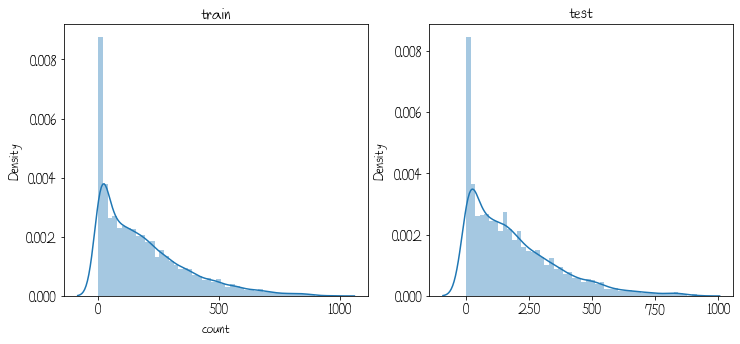

In [215]:
# 예측 데이터를 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sns.distplot(y_train, ax=ax1, bins=50)
ax1.set(title='train')
sns.distplot(predicted, ax=ax2, bins=50)
ax2.set(title='test')

<h3> Submit </h3>

In [219]:
submission = pd.read_csv('./data/samplesubmission.csv')
submission['count'] = predicted
print(submission.shape)
submission

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.590000
1,2011-01-20 01:00:00,4.750000
2,2011-01-20 02:00:00,4.190000
3,2011-01-20 03:00:00,3.700000
4,2011-01-20 04:00:00,2.860000
...,...,...
6488,2012-12-31 19:00:00,196.680000
6489,2012-12-31 20:00:00,153.080000
6490,2012-12-31 21:00:00,96.610000
6491,2012-12-31 22:00:00,100.715833


In [220]:
submission.to_csv('data/score_{0:.5f}_submission.csv'.format(score), index=False)